<a href="https://colab.research.google.com/github/AppleBoiy/ocr-handwritten-digit/blob/main/notebook/cnn_early_stop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition with CNN

In this notebook, I will train a Convolutional Neural Network (CNN) on the MNIST dataset to recognize handwritten digits.

# Step 1: Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess the Data

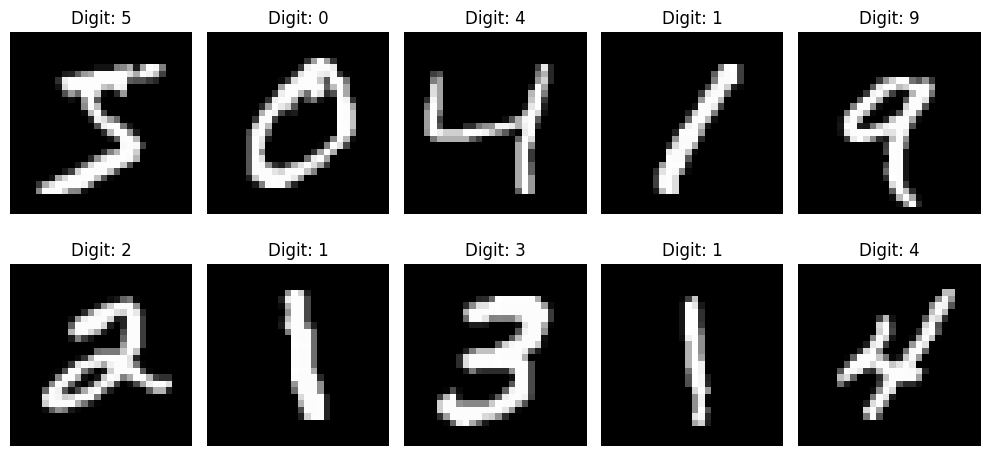

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Visualize some of the training images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Digit: {y_train[i].argmax()}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 3: Data Augmentation


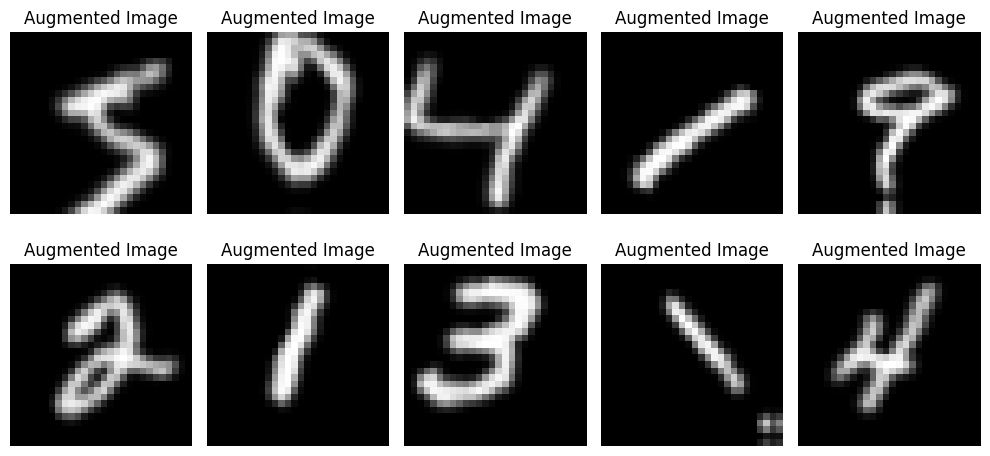

In [ ]:
# Data Augmentation
data_augmentation = models.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomZoom(0.1),
])

# Visualize augmented images
plt.figure(figsize=(10, 5))
for i in range(10):
    augmented_image = data_augmentation(tf.expand_dims(x_train[i], 0))
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_image[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('Augmented Image')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 4: Create Model

## Build the CNN model


In [ ]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 370,954 (1.42 MB)

 Trainable params: 370,954 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

# Step 5: Train the Model


In [ ]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define model checkpoint callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('early_patience5.keras',
                                                       monitor='val_loss',
                                                       save_best_only=True)

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=256,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint],
                    verbose=1)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7923 - loss: 0.6726 - val_accuracy: 0.9774 - val_loss: 0.0777
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9788 - loss: 0.0706 - val_accuracy: 0.9842 - val_loss: 0.0533
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9868 - loss: 0.0448 - val_accuracy: 0.9839 - val_loss: 0.0521
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9891 - loss: 0.0349 - val_accuracy: 0.9862 - val_loss: 0.0479
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9916 - loss: 0.0266 - val_accuracy: 0.9885 - val_loss: 0.0379
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9936 - loss: 0.0195 - val_accuracy: 0.9876 - val_loss: 0.0418
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9872 - val_loss: 0.0442
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9956 - loss: 0.0135 - val_acc

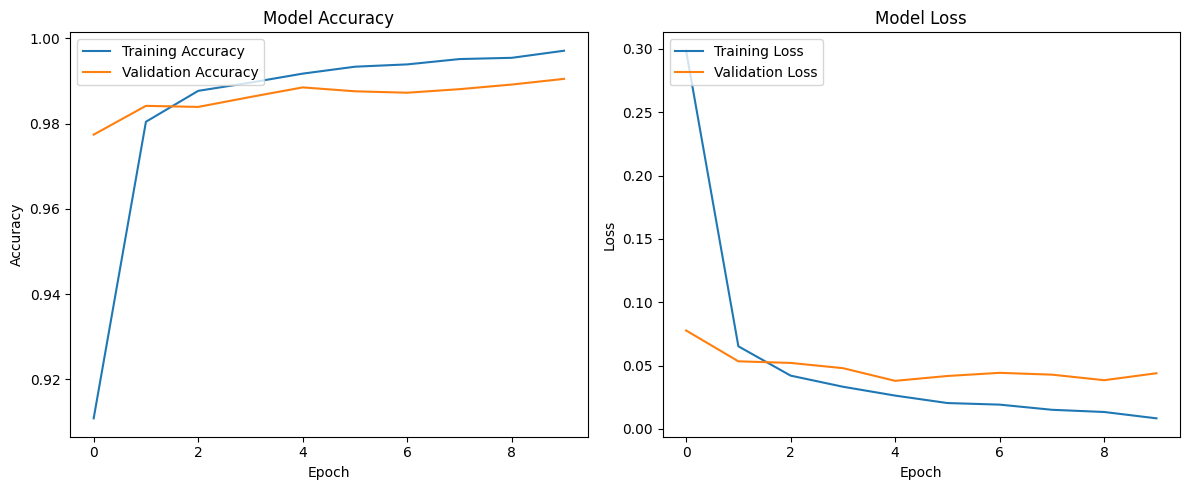

In [ ]:
# Visualize training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Visualize training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Step 6: Evaluate the Model


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9854 - loss: 0.0409
Test accuracy: 0.9894000291824341


# Step 7: Visualize Predictions


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


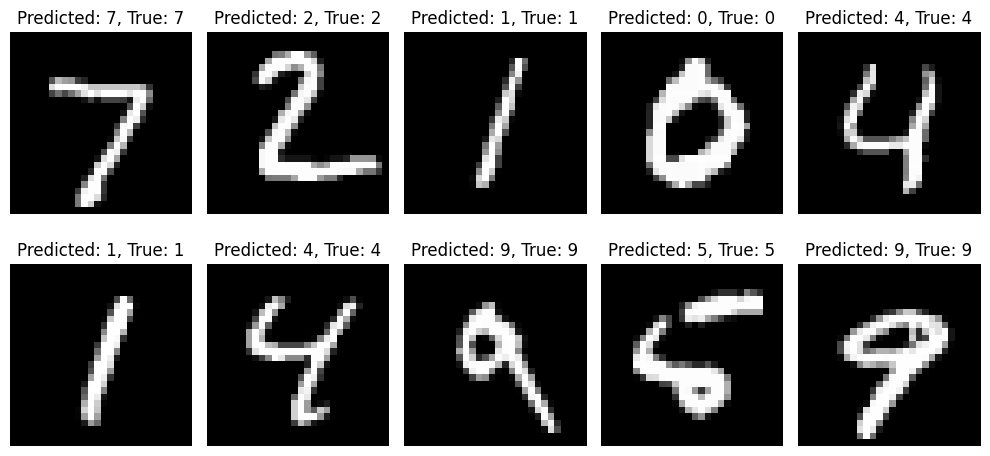

In [ ]:
predictions = model.predict(x_test)

# Visualize some predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predictions[i].argmax()}, True: {y_test[i].argmax()}')
    plt.axis('off')
plt.tight_layout()
plt.show()


# Step 8: Report Statistics


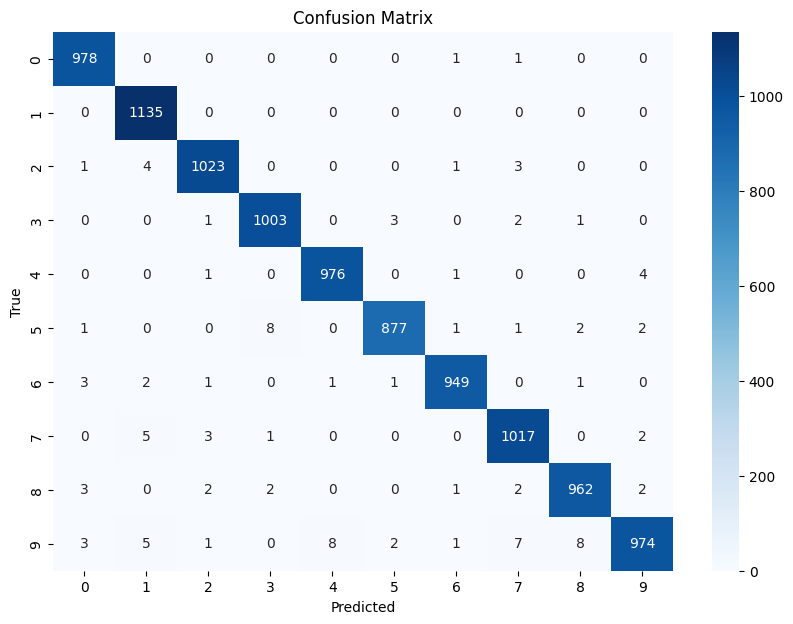

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1-score
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)
